In [286]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from hyperopt import hp, Trials, fmin, tpe, STATUS_OK

In [2]:
data_points = 100
train_data_0 = np.random.uniform(-10, 10, data_points)

mu_train_0, sigma_train_0 = 0, 0
noise_train_0 = np.random.normal(mu_train_0, sigma_train_0, data_points)

train_labels_0_pre = np.power(train_data_0, 3) + noise_train_0

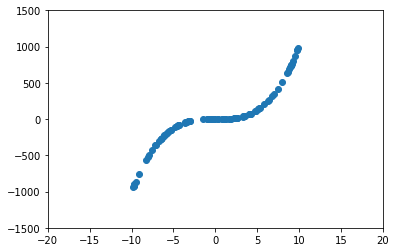

In [3]:
plt.xlim(-20, 20)
plt.ylim(-1500, 1500)
plt.scatter(train_data_0, train_labels_0_pre)
plt.show()

In [5]:
order = np.argsort(np.random.random(train_labels_0_pre.shape))

pre_train_data_0 = np.array(train_data_0[order]).reshape(data_points, 1)
train_labels_0 = np.array(train_labels_0_pre[order]).reshape(data_points, 1)

mean = pre_train_data_0.mean(axis=0)
std = pre_train_data_0.std(axis=0)

post_train_data_0 = (pre_train_data_0 - mean) / std

In [283]:
space = {
    'choice': hp.choice('layers_number', [{'layers': 'two'}, 
                                          {'layers': 'three',     
                                           'units_3': hp.choice('units_3', [25, 64, 128, 512]),
                                            'units_3_activation': 
                                               hp.choice('units_3_activation', 
                                                         [tf.keras.activations.relu, 
                                                         tf.keras.activations.sigmoid, 
                                                         tf.keras.activations.selu]),

    }]),
    'units_1': hp.choice('units1', [25, 64, 128, 512]),
    'units_1_activation': hp.choice('units_1_activation', [tf.keras.activations.relu, 
                                                         tf.keras.activations.sigmoid, 
                                                         tf.keras.activations.selu]),
    'units_2': hp.choice('units_2', [25, 64, 128, 512]),
    'units_2_activation': hp.choice('units_2_activation', [tf.keras.activations.relu, 
                                                         tf.keras.activations.sigmoid, 
                                                         tf.keras.activations.selu]),
    
    'optimizer': hp.choice('optimizers', [tf.train.RMSPropOptimizer(learning_rate=0.5)]) 
}

In [284]:
def build_model_hopt(params):
    model = keras.Sequential()
    model.add(keras.layers.Dense(params['units_1'], activation=params['units_1_activation'],
                       input_shape=(post_train_data_0.shape[1],)))
    model.add(keras.layers.Dense(params['units_2'], activation=params['units_2_activation']))
        
    if params['choice']['layers'] == 'three':
        model.add(keras.layers.Dense(params['choice']['units_3'], init = "glorot_normal")) 
        # model.add(keras.layers.Dropout(params['choice']['dropout3']))
    
    model.add(keras.layers.Dense(1))

    model.compile(loss='mse',
                optimizer=params['optimizer'],
                metrics=['mae'])
    

    model.fit(post_train_data_0, train_labels_0, epochs=EPOCHS,
                    validation_split=0.2, verbose=1, callbacks=[early_stop])
    
    predicted_0 = model.predict(train_data_0).reshape(data_points, 1)
    
    acc = np.sum(np.abs(predicted_0 - train_data_0))

    return {'loss': -acc, 'status': STATUS_OK}

In [287]:
trials = Trials()
best = fmin(build_model_hopt, space, algo=tpe.suggest, max_evals = 50, trials=trials)
print(best)

Train on 80 samples, validate on 20 samples
Epoch 1/1500
80/80 [==============================] - 1s 15ms/step - loss: 175175.9563 - mean_absolute_error: 292.3366 - val_loss: 134009.5938 - val_mean_absolute_error: 226.7930
Epoch 2/1500
80/80 [==============================] - 0s 74us/step - loss: 152904.7188 - mean_absolute_error: 255.8147 - val_loss: 121294.0625 - val_mean_absolute_error: 238.4812
Epoch 3/1500
80/80 [==============================] - 0s 72us/step - loss: 120952.8047 - mean_absolute_error: 228.5751 - val_loss: 107379.1875 - val_mean_absolute_error: 196.0613
Epoch 4/1500
80/80 [==============================] - 0s 91us/step - loss: 110832.3063 - mean_absolute_error: 222.2440 - val_loss: 103199.5469 - val_mean_absolute_error: 203.7691
Epoch 5/1500
80/80 [==============================] - 0s 102us/step - loss: 93351.8453 - mean_absolute_error: 196.8063 - val_loss: 93898.7891 - val_mean_absolute_error: 163.3428
Epoch 6/1500
80/80 [==============================] - 0s 90us/

Epoch 47/1500
80/80 [==============================] - 0s 79us/step - loss: 18753.2053 - mean_absolute_error: 75.4248 - val_loss: 25962.4883 - val_mean_absolute_error: 82.4557
Epoch 48/1500
80/80 [==============================] - 0s 73us/step - loss: 15964.3105 - mean_absolute_error: 61.9760 - val_loss: 22907.1660 - val_mean_absolute_error: 63.7638
Epoch 49/1500
80/80 [==============================] - 0s 78us/step - loss: 14664.1115 - mean_absolute_error: 54.9120 - val_loss: 28115.4570 - val_mean_absolute_error: 104.9462
Epoch 50/1500
80/80 [==============================] - 0s 103us/step - loss: 18505.0448 - mean_absolute_error: 82.1882 - val_loss: 25942.4082 - val_mean_absolute_error: 87.9865
Epoch 51/1500
80/80 [==============================] - 0s 102us/step - loss: 20135.4250 - mean_absolute_error: 88.8019 - val_loss: 22607.1211 - val_mean_absolute_error: 71.9882
Epoch 52/1500
80/80 [==============================] - 0s 123us/step - loss: 17812.7914 - mean_absolute_error: 66.241

80/80 [==============================] - 0s 92us/step - loss: 7539.9635 - mean_absolute_error: 62.4316 - val_loss: 14716.2217 - val_mean_absolute_error: 73.6126
Epoch 94/1500
80/80 [==============================] - 0s 83us/step - loss: 14441.3299 - mean_absolute_error: 84.0742 - val_loss: 14207.9609 - val_mean_absolute_error: 81.2125
Epoch 95/1500
80/80 [==============================] - 0s 79us/step - loss: 15670.8316 - mean_absolute_error: 87.8751 - val_loss: 11050.5918 - val_mean_absolute_error: 63.4012
Epoch 96/1500
80/80 [==============================] - 0s 101us/step - loss: 17251.5762 - mean_absolute_error: 80.4376 - val_loss: 11475.0752 - val_mean_absolute_error: 58.8245
Epoch 97/1500
80/80 [==============================] - 0s 77us/step - loss: 11719.1408 - mean_absolute_error: 73.2681 - val_loss: 7859.1382 - val_mean_absolute_error: 49.0601
Epoch 98/1500
80/80 [==============================] - 0s 76us/step - loss: 5984.4541 - mean_absolute_error: 41.8945 - val_loss: 9730.9

80/80 [==============================] - 0s 91us/step - loss: 11532.4521 - mean_absolute_error: 76.5317 - val_loss: 4940.3784 - val_mean_absolute_error: 56.6586
Epoch 140/1500
80/80 [==============================] - 0s 105us/step - loss: 4688.8687 - mean_absolute_error: 57.2145 - val_loss: 5842.5674 - val_mean_absolute_error: 54.0542
Epoch 141/1500
80/80 [==============================] - 0s 107us/step - loss: 2854.3570 - mean_absolute_error: 35.7071 - val_loss: 2153.3376 - val_mean_absolute_error: 25.1354
Epoch 142/1500
80/80 [==============================] - 0s 92us/step - loss: 1615.7088 - mean_absolute_error: 21.9942 - val_loss: 2268.1714 - val_mean_absolute_error: 24.2784
Epoch 143/1500
80/80 [==============================] - 0s 109us/step - loss: 1459.8577 - mean_absolute_error: 21.4303 - val_loss: 2720.5942 - val_mean_absolute_error: 30.4273
Epoch 144/1500
80/80 [==============================] - 0s 95us/step - loss: 3534.8744 - mean_absolute_error: 32.0654 - val_loss: 25529.

80/80 [==============================] - 0s 110us/step - loss: 2867.6927 - mean_absolute_error: 31.2542 - val_loss: 1520.0847 - val_mean_absolute_error: 26.3096
Epoch 186/1500
80/80 [==============================] - 0s 96us/step - loss: 1595.3732 - mean_absolute_error: 23.9807 - val_loss: 1778.6240 - val_mean_absolute_error: 26.6791
Epoch 187/1500
80/80 [==============================] - 0s 100us/step - loss: 1980.4821 - mean_absolute_error: 28.6583 - val_loss: 4890.4658 - val_mean_absolute_error: 59.1212
Epoch 188/1500
80/80 [==============================] - 0s 100us/step - loss: 5571.8099 - mean_absolute_error: 56.3744 - val_loss: 2056.0759 - val_mean_absolute_error: 35.0316
Epoch 189/1500
80/80 [==============================] - 0s 110us/step - loss: 3802.5987 - mean_absolute_error: 43.8824 - val_loss: 3364.6284 - val_mean_absolute_error: 43.3498
Epoch 190/1500
80/80 [==============================] - 0s 115us/step - loss: 8783.7851 - mean_absolute_error: 61.9476 - val_loss: 4369.

80/80 [==============================] - 0s 79us/step - loss: 6011.1615 - mean_absolute_error: 58.0298 - val_loss: 4613.0869 - val_mean_absolute_error: 45.4986
Epoch 232/1500
80/80 [==============================] - 0s 95us/step - loss: 2722.8092 - mean_absolute_error: 35.1675 - val_loss: 2745.8071 - val_mean_absolute_error: 38.7453
Epoch 233/1500
80/80 [==============================] - 0s 106us/step - loss: 2970.2932 - mean_absolute_error: 40.1667 - val_loss: 4733.2124 - val_mean_absolute_error: 58.5623
Epoch 234/1500
80/80 [==============================] - 0s 84us/step - loss: 2784.4288 - mean_absolute_error: 38.6905 - val_loss: 3011.2637 - val_mean_absolute_error: 43.3464
Epoch 235/1500
80/80 [==============================] - 0s 94us/step - loss: 2213.4664 - mean_absolute_error: 34.6992 - val_loss: 4306.8843 - val_mean_absolute_error: 48.8540
Epoch 236/1500
80/80 [==============================] - 0s 90us/step - loss: 3515.9888 - mean_absolute_error: 39.6886 - val_loss: 19213.027

Epoch 278/1500
80/80 [==============================] - 0s 93us/step - loss: 2078.5127 - mean_absolute_error: 37.9739 - val_loss: 1880.9037 - val_mean_absolute_error: 30.4535
Epoch 279/1500
80/80 [==============================] - 0s 106us/step - loss: 7631.3531 - mean_absolute_error: 55.6288 - val_loss: 4301.0996 - val_mean_absolute_error: 45.5647
Epoch 280/1500
80/80 [==============================] - 0s 102us/step - loss: 3086.9148 - mean_absolute_error: 39.6494 - val_loss: 1392.6631 - val_mean_absolute_error: 24.4225
Epoch 281/1500
80/80 [==============================] - 0s 111us/step - loss: 2063.2004 - mean_absolute_error: 28.9869 - val_loss: 1568.2269 - val_mean_absolute_error: 27.2248
Epoch 282/1500
80/80 [==============================] - 0s 108us/step - loss: 2041.3976 - mean_absolute_error: 28.7204 - val_loss: 2374.3198 - val_mean_absolute_error: 32.6823
Epoch 283/1500
80/80 [==============================] - 0s 98us/step - loss: 4094.9225 - mean_absolute_error: 40.0711 - v

80/80 [==============================] - 0s 122us/step - loss: 1798.8204 - mean_absolute_error: 26.8221 - val_loss: 1369.8143 - val_mean_absolute_error: 23.9307
Epoch 325/1500
80/80 [==============================] - 0s 82us/step - loss: 2615.4640 - mean_absolute_error: 34.2436 - val_loss: 5899.9453 - val_mean_absolute_error: 42.3230
Epoch 326/1500
80/80 [==============================] - 0s 87us/step - loss: 4963.1911 - mean_absolute_error: 46.0658 - val_loss: 2471.7900 - val_mean_absolute_error: 36.2742
Epoch 327/1500
80/80 [==============================] - 0s 101us/step - loss: 3109.8545 - mean_absolute_error: 34.6962 - val_loss: 3089.0491 - val_mean_absolute_error: 34.4650
Epoch 328/1500
80/80 [==============================] - 0s 95us/step - loss: 1852.6471 - mean_absolute_error: 28.3423 - val_loss: 4396.8721 - val_mean_absolute_error: 37.6337
Epoch 329/1500
80/80 [==============================] - 0s 76us/step - loss: 1812.3145 - mean_absolute_error: 31.6404 - val_loss: 4056.201

/Users/amirrahnama/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, kernel_initializer="glorot_normal")`
  


Train on 80 samples, validate on 20 samples
Epoch 1/1500
80/80 [==============================] - 1s 18ms/step - loss: 40322250403.7188 - mean_absolute_error: 79867.3294 - val_loss: 311612833792.0000 - val_mean_absolute_error: 492960.2500
Epoch 2/1500
80/80 [==============================] - 0s 78us/step - loss: 183481928192.0000 - mean_absolute_error: 351082.9781 - val_loss: 160690944.0000 - val_mean_absolute_error: 10548.7715
Epoch 3/1500
80/80 [==============================] - 0s 79us/step - loss: 97233208.0000 - mean_absolute_error: 7643.1029 - val_loss: 85345928.0000 - val_mean_absolute_error: 7956.3501
Epoch 4/1500
80/80 [==============================] - 0s 84us/step - loss: 53740342.4000 - mean_absolute_error: 5743.8396 - val_loss: 59927800.0000 - val_mean_absolute_error: 6520.5410
Epoch 5/1500
80/80 [==============================] - 0s 105us/step - loss: 38036882.8000 - mean_absolute_error: 4743.4091 - val_loss: 39001100.0000 - val_mean_absolute_error: 5373.1704
Epoch 6/1500

80/80 [==============================] - 0s 109us/step - loss: 142033.5625 - mean_absolute_error: 326.5853 - val_loss: 81702.1875 - val_mean_absolute_error: 246.0817
Epoch 46/1500
80/80 [==============================] - 0s 107us/step - loss: 79819.2562 - mean_absolute_error: 230.8058 - val_loss: 74858.5156 - val_mean_absolute_error: 246.2058
Epoch 47/1500
80/80 [==============================] - 0s 111us/step - loss: 77918.8469 - mean_absolute_error: 238.3357 - val_loss: 91437.3594 - val_mean_absolute_error: 248.9136
Epoch 48/1500
80/80 [==============================] - 0s 110us/step - loss: 176807.8625 - mean_absolute_error: 331.4109 - val_loss: 232331.7188 - val_mean_absolute_error: 385.7035
Epoch 49/1500
80/80 [==============================] - 0s 110us/step - loss: 223851.1000 - mean_absolute_error: 401.3627 - val_loss: 205942.3750 - val_mean_absolute_error: 346.9889
Epoch 50/1500
80/80 [==============================] - 0s 110us/step - loss: 195394.6219 - mean_absolute_error: 34

80/80 [==============================] - 0s 109us/step - loss: 176977.6797 - mean_absolute_error: 292.3489 - val_loss: 155479.8125 - val_mean_absolute_error: 262.0889
Epoch 91/1500
80/80 [==============================] - 0s 112us/step - loss: 174559.8000 - mean_absolute_error: 295.1375 - val_loss: 142172.0156 - val_mean_absolute_error: 236.0838
Epoch 92/1500
80/80 [==============================] - 0s 115us/step - loss: 175606.9734 - mean_absolute_error: 288.3266 - val_loss: 138632.6875 - val_mean_absolute_error: 237.5164
Epoch 93/1500
80/80 [==============================] - 0s 93us/step - loss: 176264.0500 - mean_absolute_error: 282.7330 - val_loss: 139183.6094 - val_mean_absolute_error: 235.8828
Epoch 94/1500
80/80 [==============================] - 0s 100us/step - loss: 176058.3687 - mean_absolute_error: 280.3826 - val_loss: 152484.0938 - val_mean_absolute_error: 255.3162
Epoch 95/1500
80/80 [==============================] - 0s 95us/step - loss: 176355.4281 - mean_absolute_error:

Epoch 28/1500
80/80 [==============================] - 0s 108us/step - loss: 2400449.4000 - mean_absolute_error: 1223.8583 - val_loss: 2755849.7500 - val_mean_absolute_error: 1445.4346
Epoch 29/1500
80/80 [==============================] - 0s 105us/step - loss: 1809785.2750 - mean_absolute_error: 1112.3658 - val_loss: 2064893.0000 - val_mean_absolute_error: 1247.2034
Epoch 30/1500
80/80 [==============================] - 0s 101us/step - loss: 1361341.1250 - mean_absolute_error: 972.8951 - val_loss: 1487723.3750 - val_mean_absolute_error: 1076.4612
Epoch 31/1500
80/80 [==============================] - 0s 108us/step - loss: 1075335.4750 - mean_absolute_error: 893.0717 - val_loss: 1165445.7500 - val_mean_absolute_error: 953.9327
Epoch 32/1500
80/80 [==============================] - 0s 102us/step - loss: 925331.5750 - mean_absolute_error: 814.4057 - val_loss: 846215.6875 - val_mean_absolute_error: 841.9413
Epoch 33/1500
80/80 [==============================] - 0s 99us/step - loss: 818729

Epoch 73/1500
80/80 [==============================] - 0s 107us/step - loss: 175109.7312 - mean_absolute_error: 285.3064 - val_loss: 142562.5938 - val_mean_absolute_error: 236.8390
Epoch 74/1500
80/80 [==============================] - 0s 90us/step - loss: 174753.2000 - mean_absolute_error: 287.6643 - val_loss: 137092.1250 - val_mean_absolute_error: 243.6537
Epoch 75/1500
80/80 [==============================] - 0s 106us/step - loss: 425792.2750 - mean_absolute_error: 493.3189 - val_loss: 3617190.5000 - val_mean_absolute_error: 1865.7035
Epoch 76/1500
80/80 [==============================] - 0s 107us/step - loss: 5109025.9000 - mean_absolute_error: 2195.9908 - val_loss: 460020.6562 - val_mean_absolute_error: 624.2322
Epoch 77/1500
80/80 [==============================] - 0s 80us/step - loss: 342576.8375 - mean_absolute_error: 461.4694 - val_loss: 179701.5469 - val_mean_absolute_error: 308.0767
Epoch 78/1500
80/80 [==============================] - 0s 88us/step - loss: 187348.9750 - mea

80/80 [==============================] - 0s 98us/step - loss: 55413.3984 - mean_absolute_error: 172.4056 - val_loss: 70599.5625 - val_mean_absolute_error: 179.6503
Epoch 119/1500
80/80 [==============================] - 0s 111us/step - loss: 52875.8684 - mean_absolute_error: 167.2625 - val_loss: 72487.0781 - val_mean_absolute_error: 167.3097
Epoch 120/1500
80/80 [==============================] - 0s 105us/step - loss: 61585.2188 - mean_absolute_error: 178.1984 - val_loss: 95538.1562 - val_mean_absolute_error: 253.2182
Epoch 121/1500
80/80 [==============================] - 0s 104us/step - loss: 102708.2906 - mean_absolute_error: 254.7042 - val_loss: 67520.9688 - val_mean_absolute_error: 180.1510
Epoch 122/1500
80/80 [==============================] - 0s 85us/step - loss: 47487.1813 - mean_absolute_error: 150.7560 - val_loss: 60231.9883 - val_mean_absolute_error: 178.5337
Epoch 123/1500
80/80 [==============================] - 0s 120us/step - loss: 41485.1922 - mean_absolute_error: 147.

80/80 [==============================] - 0s 127us/step - loss: 124786.8625 - mean_absolute_error: 299.3442 - val_loss: 297242.5625 - val_mean_absolute_error: 488.3831
Epoch 164/1500
80/80 [==============================] - 0s 109us/step - loss: 155973.0094 - mean_absolute_error: 286.7398 - val_loss: 542028.6250 - val_mean_absolute_error: 690.2374
Epoch 165/1500
80/80 [==============================] - 0s 105us/step - loss: 655393.8000 - mean_absolute_error: 687.9169 - val_loss: 553505.5000 - val_mean_absolute_error: 648.4919
Epoch 166/1500
80/80 [==============================] - 0s 115us/step - loss: 8251013.7000 - mean_absolute_error: 2063.2006 - val_loss: 513510.4375 - val_mean_absolute_error: 667.1691
Epoch 167/1500
80/80 [==============================] - 0s 121us/step - loss: 3267259.1125 - mean_absolute_error: 1536.6119 - val_loss: 2227239.5000 - val_mean_absolute_error: 1290.7571
Epoch 168/1500
80/80 [==============================] - 0s 113us/step - loss: 1095797.3656 - mean_a

80/80 [==============================] - 0s 105us/step - loss: 108039.6312 - mean_absolute_error: 259.9384 - val_loss: 102181.2266 - val_mean_absolute_error: 284.9708
Epoch 209/1500
80/80 [==============================] - 0s 120us/step - loss: 101664.5344 - mean_absolute_error: 269.1929 - val_loss: 97935.0781 - val_mean_absolute_error: 235.3974
Epoch 210/1500
80/80 [==============================] - 0s 106us/step - loss: 187810.4469 - mean_absolute_error: 327.2206 - val_loss: 410545.1250 - val_mean_absolute_error: 569.6832
Epoch 211/1500
80/80 [==============================] - 0s 111us/step - loss: 319541.7844 - mean_absolute_error: 488.8384 - val_loss: 101443.1953 - val_mean_absolute_error: 241.7760
Epoch 212/1500
80/80 [==============================] - 0s 106us/step - loss: 117200.8187 - mean_absolute_error: 280.6943 - val_loss: 81586.1250 - val_mean_absolute_error: 271.3683
Epoch 213/1500
80/80 [==============================] - 0s 119us/step - loss: 157665.2531 - mean_absolute_e

80/80 [==============================] - 0s 115us/step - loss: 2850525030.4000 - mean_absolute_error: 47415.5406 - val_loss: 2326464768.0000 - val_mean_absolute_error: 47786.4141
Epoch 17/1500
80/80 [==============================] - 0s 103us/step - loss: 2010282521.6000 - mean_absolute_error: 39748.7826 - val_loss: 118939112.0000 - val_mean_absolute_error: 9749.2637
Epoch 18/1500
80/80 [==============================] - 0s 94us/step - loss: 85251208.0000 - mean_absolute_error: 8306.2244 - val_loss: 60396788.0000 - val_mean_absolute_error: 7185.6353
Epoch 19/1500
80/80 [==============================] - 0s 120us/step - loss: 68836974.4000 - mean_absolute_error: 7856.0813 - val_loss: 171207360.0000 - val_mean_absolute_error: 11816.0918
Epoch 20/1500
80/80 [==============================] - 0s 119us/step - loss: 312188364.8000 - mean_absolute_error: 16020.8645 - val_loss: 605389312.0000 - val_mean_absolute_error: 23808.7383
Epoch 21/1500
80/80 [==============================] - 0s 118us/

80/80 [==============================] - 0s 105us/step - loss: 148725.6313 - mean_absolute_error: 297.4218 - val_loss: 171340.4219 - val_mean_absolute_error: 372.3431
Epoch 61/1500
80/80 [==============================] - 0s 135us/step - loss: 231295.4563 - mean_absolute_error: 414.7984 - val_loss: 347953.0938 - val_mean_absolute_error: 508.1246
Epoch 62/1500
80/80 [==============================] - 0s 122us/step - loss: 362364.0625 - mean_absolute_error: 531.0068 - val_loss: 207921.6562 - val_mean_absolute_error: 408.2995
Epoch 63/1500
80/80 [==============================] - 0s 103us/step - loss: 306634.6313 - mean_absolute_error: 476.2167 - val_loss: 1158684.7500 - val_mean_absolute_error: 1030.6121
Epoch 64/1500
80/80 [==============================] - 0s 118us/step - loss: 1935036.9000 - mean_absolute_error: 1283.0850 - val_loss: 2821310.7500 - val_mean_absolute_error: 1638.5872
Epoch 65/1500
80/80 [==============================] - 0s 135us/step - loss: 2701734.6500 - mean_absolu

Epoch 105/1500
80/80 [==============================] - 0s 105us/step - loss: 2943063.4500 - mean_absolute_error: 1657.0825 - val_loss: 2414433.5000 - val_mean_absolute_error: 1509.3350
Epoch 106/1500
80/80 [==============================] - 0s 111us/step - loss: 1555619.4875 - mean_absolute_error: 1105.8081 - val_loss: 357424.9375 - val_mean_absolute_error: 508.2329
Epoch 107/1500
80/80 [==============================] - 0s 114us/step - loss: 238792.2516 - mean_absolute_error: 373.4528 - val_loss: 162383.6406 - val_mean_absolute_error: 275.9096
Epoch 108/1500
80/80 [==============================] - 0s 98us/step - loss: 217853.6000 - mean_absolute_error: 370.8087 - val_loss: 154349.0156 - val_mean_absolute_error: 310.6974
Epoch 109/1500
80/80 [==============================] - 0s 124us/step - loss: 215020.4000 - mean_absolute_error: 355.2312 - val_loss: 275853.1250 - val_mean_absolute_error: 430.8869
Epoch 110/1500
80/80 [==============================] - 0s 124us/step - loss: 214114.

80/80 [==============================] - 0s 101us/step - loss: 64389.9758 - mean_absolute_error: 190.0372 - val_loss: 74253.7109 - val_mean_absolute_error: 193.9981
Epoch 35/1500
80/80 [==============================] - 0s 106us/step - loss: 53942.9758 - mean_absolute_error: 167.3696 - val_loss: 60975.5078 - val_mean_absolute_error: 154.3716
Epoch 36/1500
80/80 [==============================] - 0s 124us/step - loss: 47063.6063 - mean_absolute_error: 151.1733 - val_loss: 60336.1172 - val_mean_absolute_error: 160.5167
Epoch 37/1500
80/80 [==============================] - 0s 131us/step - loss: 64486.1547 - mean_absolute_error: 199.9089 - val_loss: 151718928.0000 - val_mean_absolute_error: 9741.7061
Epoch 38/1500
80/80 [==============================] - 0s 104us/step - loss: 46062073.3125 - mean_absolute_error: 3555.6558 - val_loss: 131726.6719 - val_mean_absolute_error: 261.4363
Epoch 39/1500
80/80 [==============================] - 0s 110us/step - loss: 170235.4344 - mean_absolute_erro

Epoch 80/1500
80/80 [==============================] - 0s 91us/step - loss: 7521.3148 - mean_absolute_error: 61.9232 - val_loss: 18108.1465 - val_mean_absolute_error: 94.3892
Epoch 81/1500
80/80 [==============================] - 0s 119us/step - loss: 29181.9438 - mean_absolute_error: 124.3181 - val_loss: 108213.2500 - val_mean_absolute_error: 217.1553
Epoch 82/1500
80/80 [==============================] - 0s 101us/step - loss: 99017.2797 - mean_absolute_error: 190.5542 - val_loss: 42859.4570 - val_mean_absolute_error: 165.9050
Epoch 83/1500
80/80 [==============================] - 0s 104us/step - loss: 32885.5953 - mean_absolute_error: 126.1456 - val_loss: 84462.6719 - val_mean_absolute_error: 172.5078
Epoch 84/1500
80/80 [==============================] - 0s 83us/step - loss: 41634.7727 - mean_absolute_error: 129.6696 - val_loss: 22748.4238 - val_mean_absolute_error: 102.8079
Epoch 85/1500
80/80 [==============================] - 0s 87us/step - loss: 47285.6156 - mean_absolute_error:

Epoch 126/1500
80/80 [==============================] - 0s 111us/step - loss: 88564.1461 - mean_absolute_error: 214.4491 - val_loss: 11324.1074 - val_mean_absolute_error: 83.8328
Epoch 127/1500
80/80 [==============================] - 0s 95us/step - loss: 11060.4725 - mean_absolute_error: 76.2236 - val_loss: 43403.5117 - val_mean_absolute_error: 170.5464
Epoch 128/1500
80/80 [==============================] - 0s 103us/step - loss: 25691.5074 - mean_absolute_error: 122.3373 - val_loss: 29658.1152 - val_mean_absolute_error: 135.9048
Epoch 129/1500
80/80 [==============================] - 0s 97us/step - loss: 9838.4605 - mean_absolute_error: 72.7205 - val_loss: 20568.5859 - val_mean_absolute_error: 107.1268
Epoch 130/1500
80/80 [==============================] - 0s 79us/step - loss: 25615.6172 - mean_absolute_error: 108.1707 - val_loss: 42586.7656 - val_mean_absolute_error: 143.0475
Epoch 131/1500
80/80 [==============================] - 0s 95us/step - loss: 50633.1078 - mean_absolute_err

80/80 [==============================] - 0s 123us/step - loss: 56224.8984 - mean_absolute_error: 143.5436 - val_loss: 76697.5938 - val_mean_absolute_error: 167.4383
Epoch 41/1500
80/80 [==============================] - 0s 101us/step - loss: 53137.9379 - mean_absolute_error: 138.0223 - val_loss: 76686.5781 - val_mean_absolute_error: 160.5894
Epoch 42/1500
80/80 [==============================] - 0s 93us/step - loss: 53193.6539 - mean_absolute_error: 135.9674 - val_loss: 76681.7422 - val_mean_absolute_error: 163.0522
Epoch 43/1500
80/80 [==============================] - 0s 113us/step - loss: 51414.6594 - mean_absolute_error: 135.4854 - val_loss: 69604.3750 - val_mean_absolute_error: 144.9611
Epoch 44/1500
80/80 [==============================] - 0s 83us/step - loss: 49424.5371 - mean_absolute_error: 133.2106 - val_loss: 94830.6484 - val_mean_absolute_error: 211.7382
Epoch 45/1500
80/80 [==============================] - 0s 87us/step - loss: 104243.6891 - mean_absolute_error: 210.5666 -

Epoch 86/1500
80/80 [==============================] - 0s 109us/step - loss: 25555.6447 - mean_absolute_error: 100.0434 - val_loss: 33083.3398 - val_mean_absolute_error: 85.4874
Epoch 87/1500
80/80 [==============================] - 0s 93us/step - loss: 23615.8023 - mean_absolute_error: 82.1696 - val_loss: 28920.1055 - val_mean_absolute_error: 84.8613
Epoch 88/1500
80/80 [==============================] - 0s 129us/step - loss: 21665.5641 - mean_absolute_error: 83.6415 - val_loss: 36259.5352 - val_mean_absolute_error: 91.9758
Epoch 89/1500
80/80 [==============================] - 0s 94us/step - loss: 23404.3469 - mean_absolute_error: 76.9754 - val_loss: 28262.1934 - val_mean_absolute_error: 104.8877
Epoch 90/1500
80/80 [==============================] - 0s 100us/step - loss: 23176.1297 - mean_absolute_error: 99.1324 - val_loss: 31413.6562 - val_mean_absolute_error: 96.3449
Epoch 91/1500
80/80 [==============================] - 0s 91us/step - loss: 26918.7777 - mean_absolute_error: 94.65

Epoch 132/1500
80/80 [==============================] - 0s 113us/step - loss: 14363.1771 - mean_absolute_error: 69.5174 - val_loss: 19089.9688 - val_mean_absolute_error: 73.1600
Epoch 133/1500
80/80 [==============================] - 0s 81us/step - loss: 14940.6625 - mean_absolute_error: 73.7850 - val_loss: 18579.9023 - val_mean_absolute_error: 87.0516
Epoch 134/1500
80/80 [==============================] - 0s 93us/step - loss: 35250.1682 - mean_absolute_error: 129.6702 - val_loss: 25379.5430 - val_mean_absolute_error: 115.5396
Epoch 135/1500
80/80 [==============================] - 0s 94us/step - loss: 24113.0660 - mean_absolute_error: 101.4515 - val_loss: 30553.6367 - val_mean_absolute_error: 132.5392
Epoch 136/1500
80/80 [==============================] - 0s 112us/step - loss: 24067.4094 - mean_absolute_error: 106.4473 - val_loss: 23651.2266 - val_mean_absolute_error: 95.3603
Epoch 137/1500
80/80 [==============================] - 0s 99us/step - loss: 21401.0066 - mean_absolute_erro

Epoch 178/1500
80/80 [==============================] - 0s 84us/step - loss: 20642.3906 - mean_absolute_error: 100.4823 - val_loss: 14959.5654 - val_mean_absolute_error: 69.0610
Epoch 179/1500
80/80 [==============================] - 0s 96us/step - loss: 14757.4891 - mean_absolute_error: 76.7069 - val_loss: 22075.7617 - val_mean_absolute_error: 104.6838
Epoch 180/1500
80/80 [==============================] - 0s 105us/step - loss: 16048.2051 - mean_absolute_error: 82.0681 - val_loss: 23019.7090 - val_mean_absolute_error: 108.3693
Epoch 181/1500
80/80 [==============================] - 0s 83us/step - loss: 17017.8664 - mean_absolute_error: 90.2723 - val_loss: 17582.6406 - val_mean_absolute_error: 80.8133
Epoch 182/1500
80/80 [==============================] - 0s 88us/step - loss: 28369.3922 - mean_absolute_error: 110.8051 - val_loss: 33526.9609 - val_mean_absolute_error: 146.3861
Epoch 183/1500
80/80 [==============================] - 0s 114us/step - loss: 17431.1605 - mean_absolute_erro

80/80 [==============================] - 0s 126us/step - loss: 223650.7094 - mean_absolute_error: 415.0918 - val_loss: 838495.3750 - val_mean_absolute_error: 667.9470
Epoch 21/1500
80/80 [==============================] - 0s 118us/step - loss: 519471.0125 - mean_absolute_error: 553.0348 - val_loss: 13645.3721 - val_mean_absolute_error: 79.5800
Epoch 22/1500
80/80 [==============================] - 0s 112us/step - loss: 15834.1756 - mean_absolute_error: 90.6079 - val_loss: 7154.2734 - val_mean_absolute_error: 73.9096
Epoch 23/1500
80/80 [==============================] - 0s 125us/step - loss: 9698.3168 - mean_absolute_error: 74.6018 - val_loss: 119428.5781 - val_mean_absolute_error: 237.0746
Epoch 24/1500
80/80 [==============================] - 0s 98us/step - loss: 212439.1344 - mean_absolute_error: 365.0642 - val_loss: 100407.5156 - val_mean_absolute_error: 260.3168
Epoch 25/1500
80/80 [==============================] - 0s 104us/step - loss: 91575.1367 - mean_absolute_error: 216.5315 

Epoch 66/1500
80/80 [==============================] - 0s 106us/step - loss: 62011.4000 - mean_absolute_error: 190.2036 - val_loss: 68808.4062 - val_mean_absolute_error: 185.8761
Epoch 67/1500
80/80 [==============================] - 0s 121us/step - loss: 60875.7203 - mean_absolute_error: 193.1071 - val_loss: 75104.0547 - val_mean_absolute_error: 202.0866
Epoch 68/1500
80/80 [==============================] - 0s 119us/step - loss: 73446.5672 - mean_absolute_error: 214.8292 - val_loss: 72178.4609 - val_mean_absolute_error: 174.2484
Epoch 69/1500
80/80 [==============================] - 0s 96us/step - loss: 53298.3547 - mean_absolute_error: 154.7276 - val_loss: 65906.2109 - val_mean_absolute_error: 189.4881
Epoch 70/1500
80/80 [==============================] - 0s 115us/step - loss: 52723.4531 - mean_absolute_error: 174.3940 - val_loss: 63154.8516 - val_mean_absolute_error: 168.2967
Epoch 71/1500
80/80 [==============================] - 0s 132us/step - loss: 64217.0812 - mean_absolute_er

/Users/amirrahnama/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, kernel_initializer="glorot_normal")`
  


Train on 80 samples, validate on 20 samples
Epoch 1/1500
80/80 [==============================] - 1s 18ms/step - loss: 1095418156204.7687 - mean_absolute_error: 504856.1509 - val_loss: 378355548160.0000 - val_mean_absolute_error: 512987.5625
Epoch 2/1500
80/80 [==============================] - 0s 132us/step - loss: 206812742092.8000 - mean_absolute_error: 313141.1316 - val_loss: 1597717120.0000 - val_mean_absolute_error: 35985.6875
Epoch 3/1500
80/80 [==============================] - 0s 159us/step - loss: 777223475.2000 - mean_absolute_error: 22866.8148 - val_loss: 225213008.0000 - val_mean_absolute_error: 13749.1934
Epoch 4/1500
80/80 [==============================] - 0s 166us/step - loss: 218845721.6000 - mean_absolute_error: 13623.3574 - val_loss: 281723744.0000 - val_mean_absolute_error: 16279.0576
Epoch 5/1500
80/80 [==============================] - 0s 175us/step - loss: 308302950.4000 - mean_absolute_error: 16139.9430 - val_loss: 351374624.0000 - val_mean_absolute_error: 1795

80/80 [==============================] - 0s 188us/step - loss: 196592.3562 - mean_absolute_error: 383.7190 - val_loss: 415933.0625 - val_mean_absolute_error: 595.7601
Epoch 45/1500
80/80 [==============================] - 0s 160us/step - loss: 354077.4500 - mean_absolute_error: 537.9681 - val_loss: 788818.0000 - val_mean_absolute_error: 851.6129
Epoch 46/1500
80/80 [==============================] - 0s 155us/step - loss: 2540798.1500 - mean_absolute_error: 1460.3646 - val_loss: 16533978.0000 - val_mean_absolute_error: 4056.4829
Epoch 47/1500
80/80 [==============================] - 0s 165us/step - loss: 30130315.2000 - mean_absolute_error: 5352.6652 - val_loss: 50303056.0000 - val_mean_absolute_error: 7076.6064
Epoch 48/1500
80/80 [==============================] - 0s 156us/step - loss: 46028191.2000 - mean_absolute_error: 6762.7679 - val_loss: 21627558.0000 - val_mean_absolute_error: 4636.0967
Epoch 49/1500
80/80 [==============================] - 0s 167us/step - loss: 23048674.0000 -

Epoch 89/1500
80/80 [==============================] - 0s 168us/step - loss: 2411825574.8000 - mean_absolute_error: 44645.8350 - val_loss: 2538116.0000 - val_mean_absolute_error: 1553.0697
Epoch 90/1500
80/80 [==============================] - 0s 147us/step - loss: 1335298.8500 - mean_absolute_error: 943.8478 - val_loss: 138026.1406 - val_mean_absolute_error: 238.1054
Epoch 91/1500
80/80 [==============================] - 0s 153us/step - loss: 165157.7000 - mean_absolute_error: 285.0166 - val_loss: 127661.9766 - val_mean_absolute_error: 254.2387
Epoch 92/1500
80/80 [==============================] - 0s 150us/step - loss: 166746.4375 - mean_absolute_error: 276.8197 - val_loss: 146115.5156 - val_mean_absolute_error: 257.2371
Epoch 93/1500
80/80 [==============================] - 0s 160us/step - loss: 167193.4312 - mean_absolute_error: 289.9010 - val_loss: 145840.8125 - val_mean_absolute_error: 257.3335
Epoch 94/1500
80/80 [==============================] - 0s 170us/step - loss: 181679.88

Epoch 134/1500
80/80 [==============================] - 0s 156us/step - loss: 173648357.8000 - mean_absolute_error: 9886.7000 - val_loss: 1113760.7500 - val_mean_absolute_error: 1001.0139
Epoch 135/1500
80/80 [==============================] - 0s 144us/step - loss: 595996.7562 - mean_absolute_error: 667.6404 - val_loss: 148547.0938 - val_mean_absolute_error: 296.1812
Epoch 136/1500
80/80 [==============================] - 0s 158us/step - loss: 164568.5969 - mean_absolute_error: 310.6153 - val_loss: 119174.9219 - val_mean_absolute_error: 234.4651
Epoch 137/1500
80/80 [==============================] - 0s 145us/step - loss: 157266.4187 - mean_absolute_error: 292.6583 - val_loss: 109406.0000 - val_mean_absolute_error: 244.0600
Epoch 138/1500
80/80 [==============================] - 0s 157us/step - loss: 163120.1109 - mean_absolute_error: 279.5661 - val_loss: 106752.7031 - val_mean_absolute_error: 229.9600
Epoch 139/1500
80/80 [==============================] - 0s 168us/step - loss: 160147

/Users/amirrahnama/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="glorot_normal")`
  


Train on 80 samples, validate on 20 samples
Epoch 1/1500
80/80 [==============================] - 1s 18ms/step - loss: 115670256.5594 - mean_absolute_error: 5058.1924 - val_loss: 507462144.0000 - val_mean_absolute_error: 22523.8945
Epoch 2/1500
80/80 [==============================] - 0s 89us/step - loss: 203604993.2500 - mean_absolute_error: 10234.5461 - val_loss: 424624.0000 - val_mean_absolute_error: 598.6251
Epoch 3/1500
80/80 [==============================] - 0s 119us/step - loss: 378076.8125 - mean_absolute_error: 476.8471 - val_loss: 136657.4375 - val_mean_absolute_error: 247.4455
Epoch 4/1500
80/80 [==============================] - 0s 106us/step - loss: 176991.2063 - mean_absolute_error: 283.4577 - val_loss: 137876.5312 - val_mean_absolute_error: 240.1226
Epoch 5/1500
80/80 [==============================] - 0s 132us/step - loss: 174637.7250 - mean_absolute_error: 277.0942 - val_loss: 141024.0938 - val_mean_absolute_error: 234.5607
Epoch 6/1500
80/80 [========================

Epoch 46/1500
80/80 [==============================] - 0s 126us/step - loss: 173577.0437 - mean_absolute_error: 288.7530 - val_loss: 139667.4219 - val_mean_absolute_error: 234.9590
Epoch 47/1500
80/80 [==============================] - 0s 119us/step - loss: 174322.4000 - mean_absolute_error: 273.6226 - val_loss: 139899.4219 - val_mean_absolute_error: 234.7613
Epoch 48/1500
80/80 [==============================] - 0s 95us/step - loss: 174062.4656 - mean_absolute_error: 274.5348 - val_loss: 141426.3438 - val_mean_absolute_error: 234.8486
Epoch 49/1500
80/80 [==============================] - 0s 121us/step - loss: 203573.7844 - mean_absolute_error: 337.9905 - val_loss: 9207624.0000 - val_mean_absolute_error: 3011.8567
Epoch 50/1500
80/80 [==============================] - 0s 126us/step - loss: 28933101.0000 - mean_absolute_error: 4883.5311 - val_loss: 298594.1875 - val_mean_absolute_error: 491.3342
Epoch 51/1500
80/80 [==============================] - 0s 137us/step - loss: 287637.3141 - 

80/80 [==============================] - 0s 108us/step - loss: 199153.4500 - mean_absolute_error: 338.2352 - val_loss: 143728.5312 - val_mean_absolute_error: 238.9608
Epoch 92/1500
80/80 [==============================] - 0s 130us/step - loss: 187472.5875 - mean_absolute_error: 307.8012 - val_loss: 269449.1875 - val_mean_absolute_error: 423.9482
Epoch 93/1500
80/80 [==============================] - 0s 123us/step - loss: 197987.8875 - mean_absolute_error: 363.4024 - val_loss: 139023.8594 - val_mean_absolute_error: 236.3388
Epoch 94/1500
80/80 [==============================] - 0s 107us/step - loss: 412213.9562 - mean_absolute_error: 489.3314 - val_loss: 2142167.7500 - val_mean_absolute_error: 1416.2720
Epoch 95/1500
80/80 [==============================] - 0s 114us/step - loss: 1746882.4750 - mean_absolute_error: 1224.1736 - val_loss: 164712.8125 - val_mean_absolute_error: 280.2214
Epoch 96/1500
80/80 [==============================] - 0s 126us/step - loss: 175512.2125 - mean_absolute_

Epoch 136/1500
80/80 [==============================] - 0s 142us/step - loss: 277400.7188 - mean_absolute_error: 442.7234 - val_loss: 342157.6875 - val_mean_absolute_error: 532.0252
Epoch 137/1500
80/80 [==============================] - 0s 122us/step - loss: 550539.5875 - mean_absolute_error: 639.7254 - val_loss: 639731.8750 - val_mean_absolute_error: 713.8633
Epoch 138/1500
80/80 [==============================] - 0s 110us/step - loss: 354231.8047 - mean_absolute_error: 490.0343 - val_loss: 136869.7188 - val_mean_absolute_error: 263.7452
Epoch 139/1500
80/80 [==============================] - 0s 127us/step - loss: 178613.6687 - mean_absolute_error: 298.1752 - val_loss: 139161.4062 - val_mean_absolute_error: 275.7940
Epoch 140/1500
80/80 [==============================] - 0s 127us/step - loss: 180496.2297 - mean_absolute_error: 299.6069 - val_loss: 142891.2188 - val_mean_absolute_error: 286.9252
Epoch 141/1500
80/80 [==============================] - 0s 138us/step - loss: 182538.2344 

Epoch 181/1500
80/80 [==============================] - 0s 147us/step - loss: 175905.5094 - mean_absolute_error: 287.9080 - val_loss: 136613.7812 - val_mean_absolute_error: 247.9550
Epoch 182/1500
80/80 [==============================] - 0s 122us/step - loss: 200272.9500 - mean_absolute_error: 309.9003 - val_loss: 318377.0938 - val_mean_absolute_error: 473.4019
Epoch 183/1500
80/80 [==============================] - 0s 124us/step - loss: 317273.7031 - mean_absolute_error: 426.3930 - val_loss: 183471.4375 - val_mean_absolute_error: 314.2810
Epoch 184/1500
80/80 [==============================] - 0s 134us/step - loss: 171709.4688 - mean_absolute_error: 291.3694 - val_loss: 139243.3438 - val_mean_absolute_error: 235.7156
Epoch 185/1500
80/80 [==============================] - 0s 122us/step - loss: 205834.6719 - mean_absolute_error: 317.5980 - val_loss: 988413.0000 - val_mean_absolute_error: 923.0771
Epoch 186/1500
80/80 [==============================] - 0s 142us/step - loss: 5461345.8625

KeyboardInterrupt: 

In [269]:
def build_model(train_data):
    model = keras.Sequential([
       keras.layers.Dense(64, activation=tf.keras.activations.relu,
                       input_shape=(train_data.shape[1],)),
       keras.layers.Dense(128, activation=tf.keras.activations.sigmoid,
                       input_shape=(train_data.shape[1],)),
       keras.layers.Dense(1)
    ])

    optimizer = tf.train.RMSPropOptimizer(learning_rate=0.5)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

In [252]:
model_0 = build_model(post_train_data_0)
model_0.summary()

NameError: name 'Sequential' is not defined

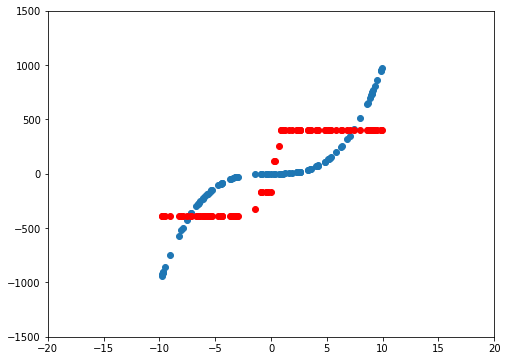

In [240]:
EPOCHS = 1500

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=60)

# Store training stats
history_0 = model_0.fit(post_train_data_0, train_labels_0, epochs=EPOCHS,
                    validation_split=0.2, verbose=0, callbacks=[early_stop])

predicted_0 = model_0.predict(train_data_0).reshape(data_points, 1)


plt.figure(figsize=(8,6))

plt.xlim(-20, 20)
plt.ylim(-1500, 1500)
plt.scatter(train_data_0, train_labels_0_pre)
plt.scatter(train_data_0, predicted_0, c='red')
plt.show()

### A uniform distribution with Guassian noise (0, 50)

In [137]:
train_data_1 = np.random.uniform(-10, 10, 100)

mu_train_1, sigma_train_1 = 0, 50
noise_train_1 = np.random.normal(mu_train_1, sigma_train_1, 100)

train_labels_1_pre = np.power(train_data_1, 3) + noise_train_1

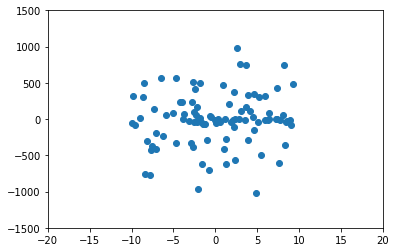

In [138]:
plt.xlim(-20, 20)
plt.ylim(-1500, 1500)
plt.scatter(train_data_1, train_labels_1)
plt.show()

In [141]:
order = np.argsort(np.random.random(train_labels_1.shape))

pre_train_data_1 = np.array(train_data_1[order]).reshape(100, 1)
train_labels_1 = np.array(train_labels_1_pre[order]).reshape(100, 1)

mean = pre_train_data_1.mean(axis=0)
std = pre_train_data_1.std(axis=0)

post_train_data_1 = (pre_train_data_1 - mean) / std

/Users/amirrahnama/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [142]:
model_1 = build_model(post_train_data_1)
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 65        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [143]:
EPOCHS = 500

# Store training stats
history_1 = model_1.fit(post_train_data_1, train_labels_1, epochs=EPOCHS,
                    validation_split=0.2, verbose=0)

In [30]:
predicted = model_1.predict(train_data_1).reshape(100, 1)

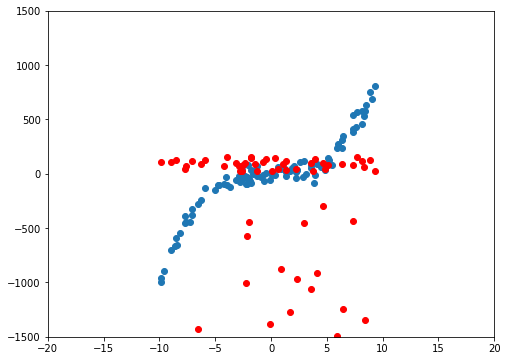

In [144]:
plt.figure(figsize=(8,6))

plt.xlim(-20, 20)
plt.ylim(-1500, 1500)
plt.scatter(train_data_1, train_labels_1_pre)
plt.scatter(train_data_1, predicted, c='red')
plt.show()


### Add more data to the same model

In [84]:
mu_train_2, sigma_train_2 = 0, 100

noise_train_2 = np.random.normal(mu_train_2, sigma_train_2, 100)
train_labels_2 = np.power(train_data_1, 3) + noise_train_2

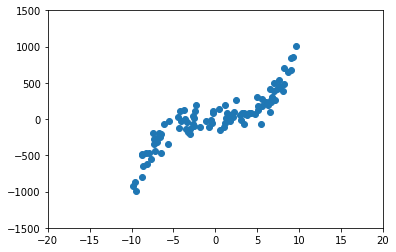

In [86]:
plt.xlim(-20, 20)
plt.ylim(-1500, 1500)
plt.scatter(train_data_1, train_labels_2)
plt.show()

In [87]:
order = np.argsort(np.random.random(train_labels_1.shape))
train_labels_2 = np.array(train_labels_2[order]).reshape(100, 1)

In [88]:
model_2 = build_model(post_train_data_1)
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [89]:
EPOCHS = 500

# Store training stats
history_2 = model_2.fit(post_train_data_1, train_labels_2, epochs=EPOCHS,
                    validation_split=0.2, verbose=0)

In [90]:
predicted_2 = model_2.predict(train_data_1).reshape(100, 1)

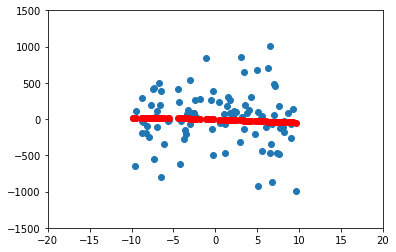

In [91]:
plt.xlim(-20, 20)
plt.ylim(-1500, 1500)
plt.scatter(train_data_1, train_labels_2)
plt.scatter(train_data_1, predicted_2, c='red')
plt.show()

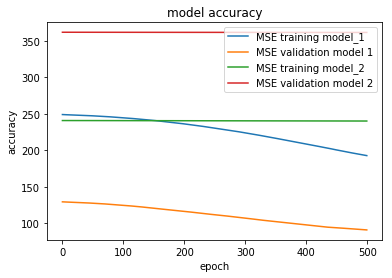

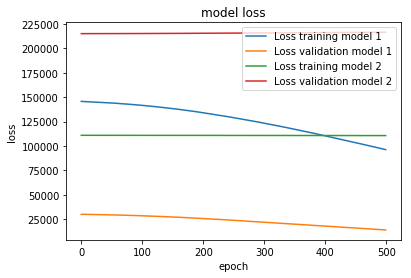

In [92]:
plt.plot(history_1.history['mean_absolute_error'], label= "MSE training model_1")
plt.plot(history_1.history['val_mean_absolute_error'], label= "MSE validation model 1")
plt.plot(history_2.history['mean_absolute_error'], label= "MSE training model_2")
plt.plot(history_2.history['val_mean_absolute_error'], label= "MSE validation model 2")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

# summarize history for loss
plt.plot(history_1.history['loss'], label="Loss training model 1")
plt.plot(history_1.history['val_loss'], label="Loss validation model 1")
plt.plot(history_2.history['loss'], label="Loss training model 2")
plt.plot(history_2.history['val_loss'], label="Loss validation model 2")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

In [93]:
np.mean(history_1.history['mean_absolute_error'])

227.212269732666

In [94]:
np.mean(history_2.history['mean_absolute_error'])

240.6719835479736

In [80]:
model_1.count_params()

193

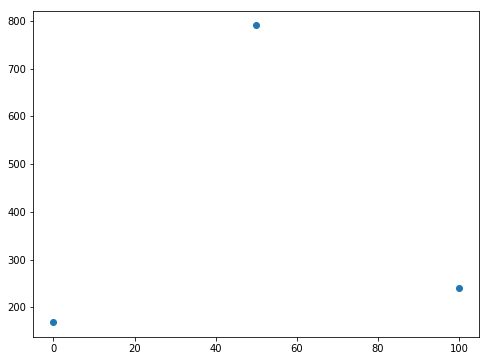

In [132]:
x = [np.mean(history_0.history['mean_absolute_error']), 
     np.mean(history_1.history['mean_absolute_error']), 
     np.mean(history_2.history['mean_absolute_error'])]

y = [sigma_train_0, sigma_train_1, sigma_train_2]

plt.figure(figsize=(8,6))

plt.scatter(y, x)
plt.show()